In [ ]:
### in this task missing values *should be imputed* with the mean value of the column
### impute missing values only in columns required for solutions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

#%matplotlib inline
#import matplotlib_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("amazon_books_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        946 non-null    object 
 1   author       824 non-null    object 
 2   price        944 non-null    float64
 3   pages        934 non-null    float64
 4   avg_reviews  823 non-null    float64
 5   n_reviews    946 non-null    int64  
 6   dimensions   914 non-null    object 
 7   weight       943 non-null    object 
 8   language     943 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 66.6+ KB


#### Question 1

In [3]:
### decide what data type each column is: numerical-discrete, numerical-continuous, categorical-nominal, categorical-ordinal
### consider only [price, pages, avg_reviews, n_reviews, language] for this analysis
### no need to add explanations, just the final answer

In [4]:
# price : numerical-continuous
# pages : numerical-discrete
# avg_reviews : numerical-continuous
# n_reviews : numerical-discrete
# language : categorical-nominal

#### Question 2

In [5]:
### plot a histogram of books' number of pages using 50 bins
### decide if the distribution is symmetric, skewed positive or skewed negative
### use both the histogram and required computations for this decision

<Axes: >

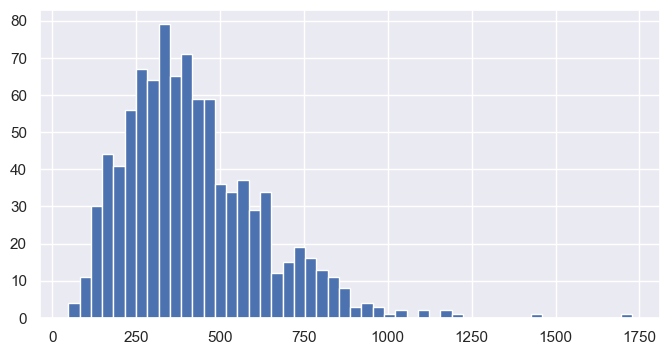

In [6]:
df['pages'].hist(bins = 50)

In [7]:
df['pages'].skew()

1.1281671549688748

In [8]:
# positive skewed

#### Question 3

In [ ]:
### inspect the 'weight' column carefully
### plot a histogram of books' weight using 50 bins
### decide if the distribution is symmetric, skewed positive or skewed negative
### use both the histogram and required computations for this decision

<Axes: >

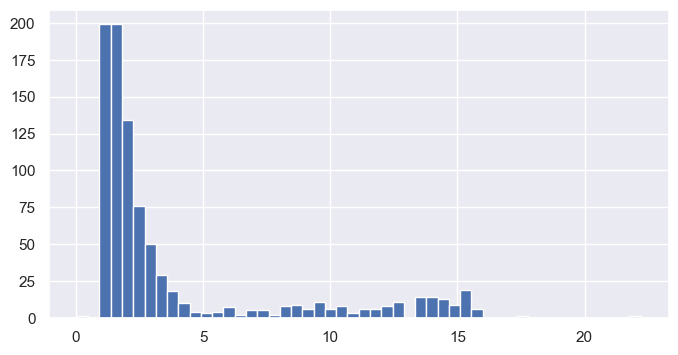

In [12]:
df['weight without units'] = df['weight'].str.extract(r'(\d+.\d+)').astype(float)
df['weight without units'].hist(bins = 50)

In [14]:
df['weight without units'].skew()
#  form the histogram we can see that the distribution is skewed positive and also form the computation we can see that the skewness is positive

1.7456638698489415

#### Question 4

In [ ]:
### compute Pearson's correlation between a book's volume (inferred by its dimensions) and price in the data
### (you can use the built-in Series.corr() function for that purpose)

#### Question 5

In [ ]:
### show a scatter plot of a book's volume (inferred by its dimensions) and price
### do the results fit the score you got in the previous cell? (no need to print answer to this question)

#### Question 6

In [ ]:
### inspect book titles carefully: they can be roughly split by keyphrases:
### ['data science', 'data analytics', 'data engineering', 'machine learning', 'statistics', 
### 'deep learning', 'natural language processing']

### a book belongs to one of the above categories if its name contains the corresponding keyphrase
### display the number of books that fall into each category and their total, in the same table
### some books may not belong to any of the listed above categories
### category match should be case insensitive

#### Question 7

In [ ]:
### display the same result where the dataframe is sorted by the number of books, descending
### no need to display the total amount in this result - drop it

#### Question 8

In [ ]:
### sample 10000 values from N~(50, 10)
### for this pirpose use https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

### what portion of the distribution is found in the range (42.5, 57.5)? -- calculate using z table
### (recall the NormalDist().cdf() function we used at the lecture)

### what portion of the distribution is found in the range (42.5, 57.5)? -- compute empirically using the sampled values
### report both values (calculated and empirical)

#### Question 9

In [ ]:
### compute confidence interval of 90% for the true population mean of a book price on Amazon
### report left and right boundaries

#### Question 10

In [ ]:
### can one say with 85% confidence that the true population mean of a book price resides within the [49.0, 54.0] interval?
### show your computations, and print your answer: yes or no